In [202]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [203]:
df=pd.read_csv('preprocessed_data.csv')

In [204]:
X=df.drop(['World Rank','Region Rank','Score Category'], axis=1)
y=df['Score Category']

In [205]:
y=pd.DataFrame(y)

In [206]:
y.shape

(599, 1)

In [207]:
X.shape

(599, 32)

In [208]:
X.shape

(599, 32)

In [209]:
y.shape

(599, 1)

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from imblearn.over_sampling import SMOTE

In [211]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [212]:
y.dtypes

Score Category    int64
dtype: object

In [213]:
y.value_counts()

Score Category
5                 198
4                 198
3                 198
2                 198
1                 198
dtype: int64

In [214]:
#y.value_counts().plot(kind="bar")

In [215]:
X.columns[(X < 0).any()]

Index(['GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'Inflation (%)',
       'FDI Inflow (Millions)'],
      dtype='object')

In [216]:
X2=X.copy()

In [217]:
X2=X2.drop(['GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'Inflation (%)','FDI Inflow (Millions)'], axis=1)
X2.head()

,Unnamed: 0,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov Spending,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,...,"GDP (Billions, PPP)",GDP per Capita (PPP),Unemployment (%),Public Debt (% of GDP),Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
0,1,65.2,30,31.0,92.6,75.1,81.0,49.0,78.4,79.8,...,24.9,7741,13.5,58.9,0,1,0,0,0,0
1,2,49.6,30,29.0,80.4,44.1,65.2,52.6,76.6,67.8,...,263.7,7333,10.0,9.9,0,0,1,0,0,0
2,4,46.7,15,30.0,64.3,52.1,60.1,47.4,60.4,67.6,...,716.4,17516,7.2,44.2,0,0,0,0,1,0
3,5,69.4,30,26.0,88.0,82.1,87.6,77.1,73.0,85.4,...,17.9,5384,5.9,35.1,0,1,0,0,0,0
4,6,82.6,90,88.0,66.4,62.8,95.5,83.5,83.8,86.2,...,914.5,40234,5.1,22.9,1,0,0,0,0,0


In [218]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X2,y)

In [219]:
f_p_values

(array([8.36597929e+02, 2.99260668e+03, 1.55399037e+04, 1.09301599e+04,
        6.96976194e+01, 8.88774025e+02, 3.67242704e+03, 2.81526770e+03,
        5.41622690e+02, 1.02052311e+03, 8.90096856e+03, 7.80482432e+03,
        2.28944765e+03, 1.26730721e+02, 3.92941697e+02, 4.64518382e+02,
        4.39931319e+02, 2.30214621e+04, 1.69181030e+05, 1.19963217e+07,
        1.33126019e+03, 1.19214252e+03, 1.98097744e+02, 1.45511111e+02,
        1.72786885e+01, 1.81538462e+01, 5.50508475e+01, 1.25939024e+02]),
 array([9.06967616e-180, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        2.62923250e-014, 4.50723581e-191, 0.00000000e+000, 0.00000000e+000,
        6.64346617e-116, 1.27310716e-219, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.94726835e-026, 9.31746186e-084, 3.15466903e-099,
        6.52308087e-094, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        5.55146418e-287, 8.04576152e-257, 9.63459738e-042, 1.86405376e-030,
        1.70619219e-003, 1.15151696e-0

In [220]:
p_values=pd.Series(f_p_values[1])
p_values.index=X2.columns
p_values
#p value should be lower and f score should be higher 

Unnamed: 0                               9.069676e-180
Year Score                                0.000000e+00
Property Rights                           0.000000e+00
Freedom from Corruption                   0.000000e+00
Fiscal Freedom                            2.629232e-14
Gov Spending                             4.507236e-191
Business Freedom                          0.000000e+00
Labor Freedom                             0.000000e+00
Monetary Freedom                         6.643466e-116
Trade Freedom                            1.273107e-219
Investment Freedom                        0.000000e+00
Financial Freedom                         0.000000e+00
Tariff Rate (%)                           0.000000e+00
Income Tax Rate (%)                       1.947268e-26
Corporate Tax Rate (%)                    9.317462e-84
Tax Burden % of GDP                       3.154669e-99
Gov Expenditure % of GDP                  6.523081e-94
Population (Millions)                     0.000000e+00
GDP (Billi

In [221]:
p_values.sort_index(ascending=False)

Year Score                                0.000000e+00
Unnamed: 0                               9.069676e-180
Unemployment (%)                         5.551464e-287
Trade Freedom                            1.273107e-219
Tax Burden % of GDP                       3.154669e-99
Tariff Rate (%)                           0.000000e+00
Sub-Saharan Africa                        2.875156e-26
South and Central America / Caribbean     3.170242e-11
Public Debt (% of GDP)                   8.045762e-257
Property Rights                           0.000000e+00
Population (Millions)                     0.000000e+00
North America                             1.151517e-03
Monetary Freedom                         6.643466e-116
Middle East / North Africa                1.706192e-03
Labor Freedom                             0.000000e+00
Investment Freedom                        0.000000e+00
Income Tax Rate (%)                       1.947268e-26
Gov Spending                             4.507236e-191
Gov Expend

<AxesSubplot:xlabel='value', ylabel='variable'>

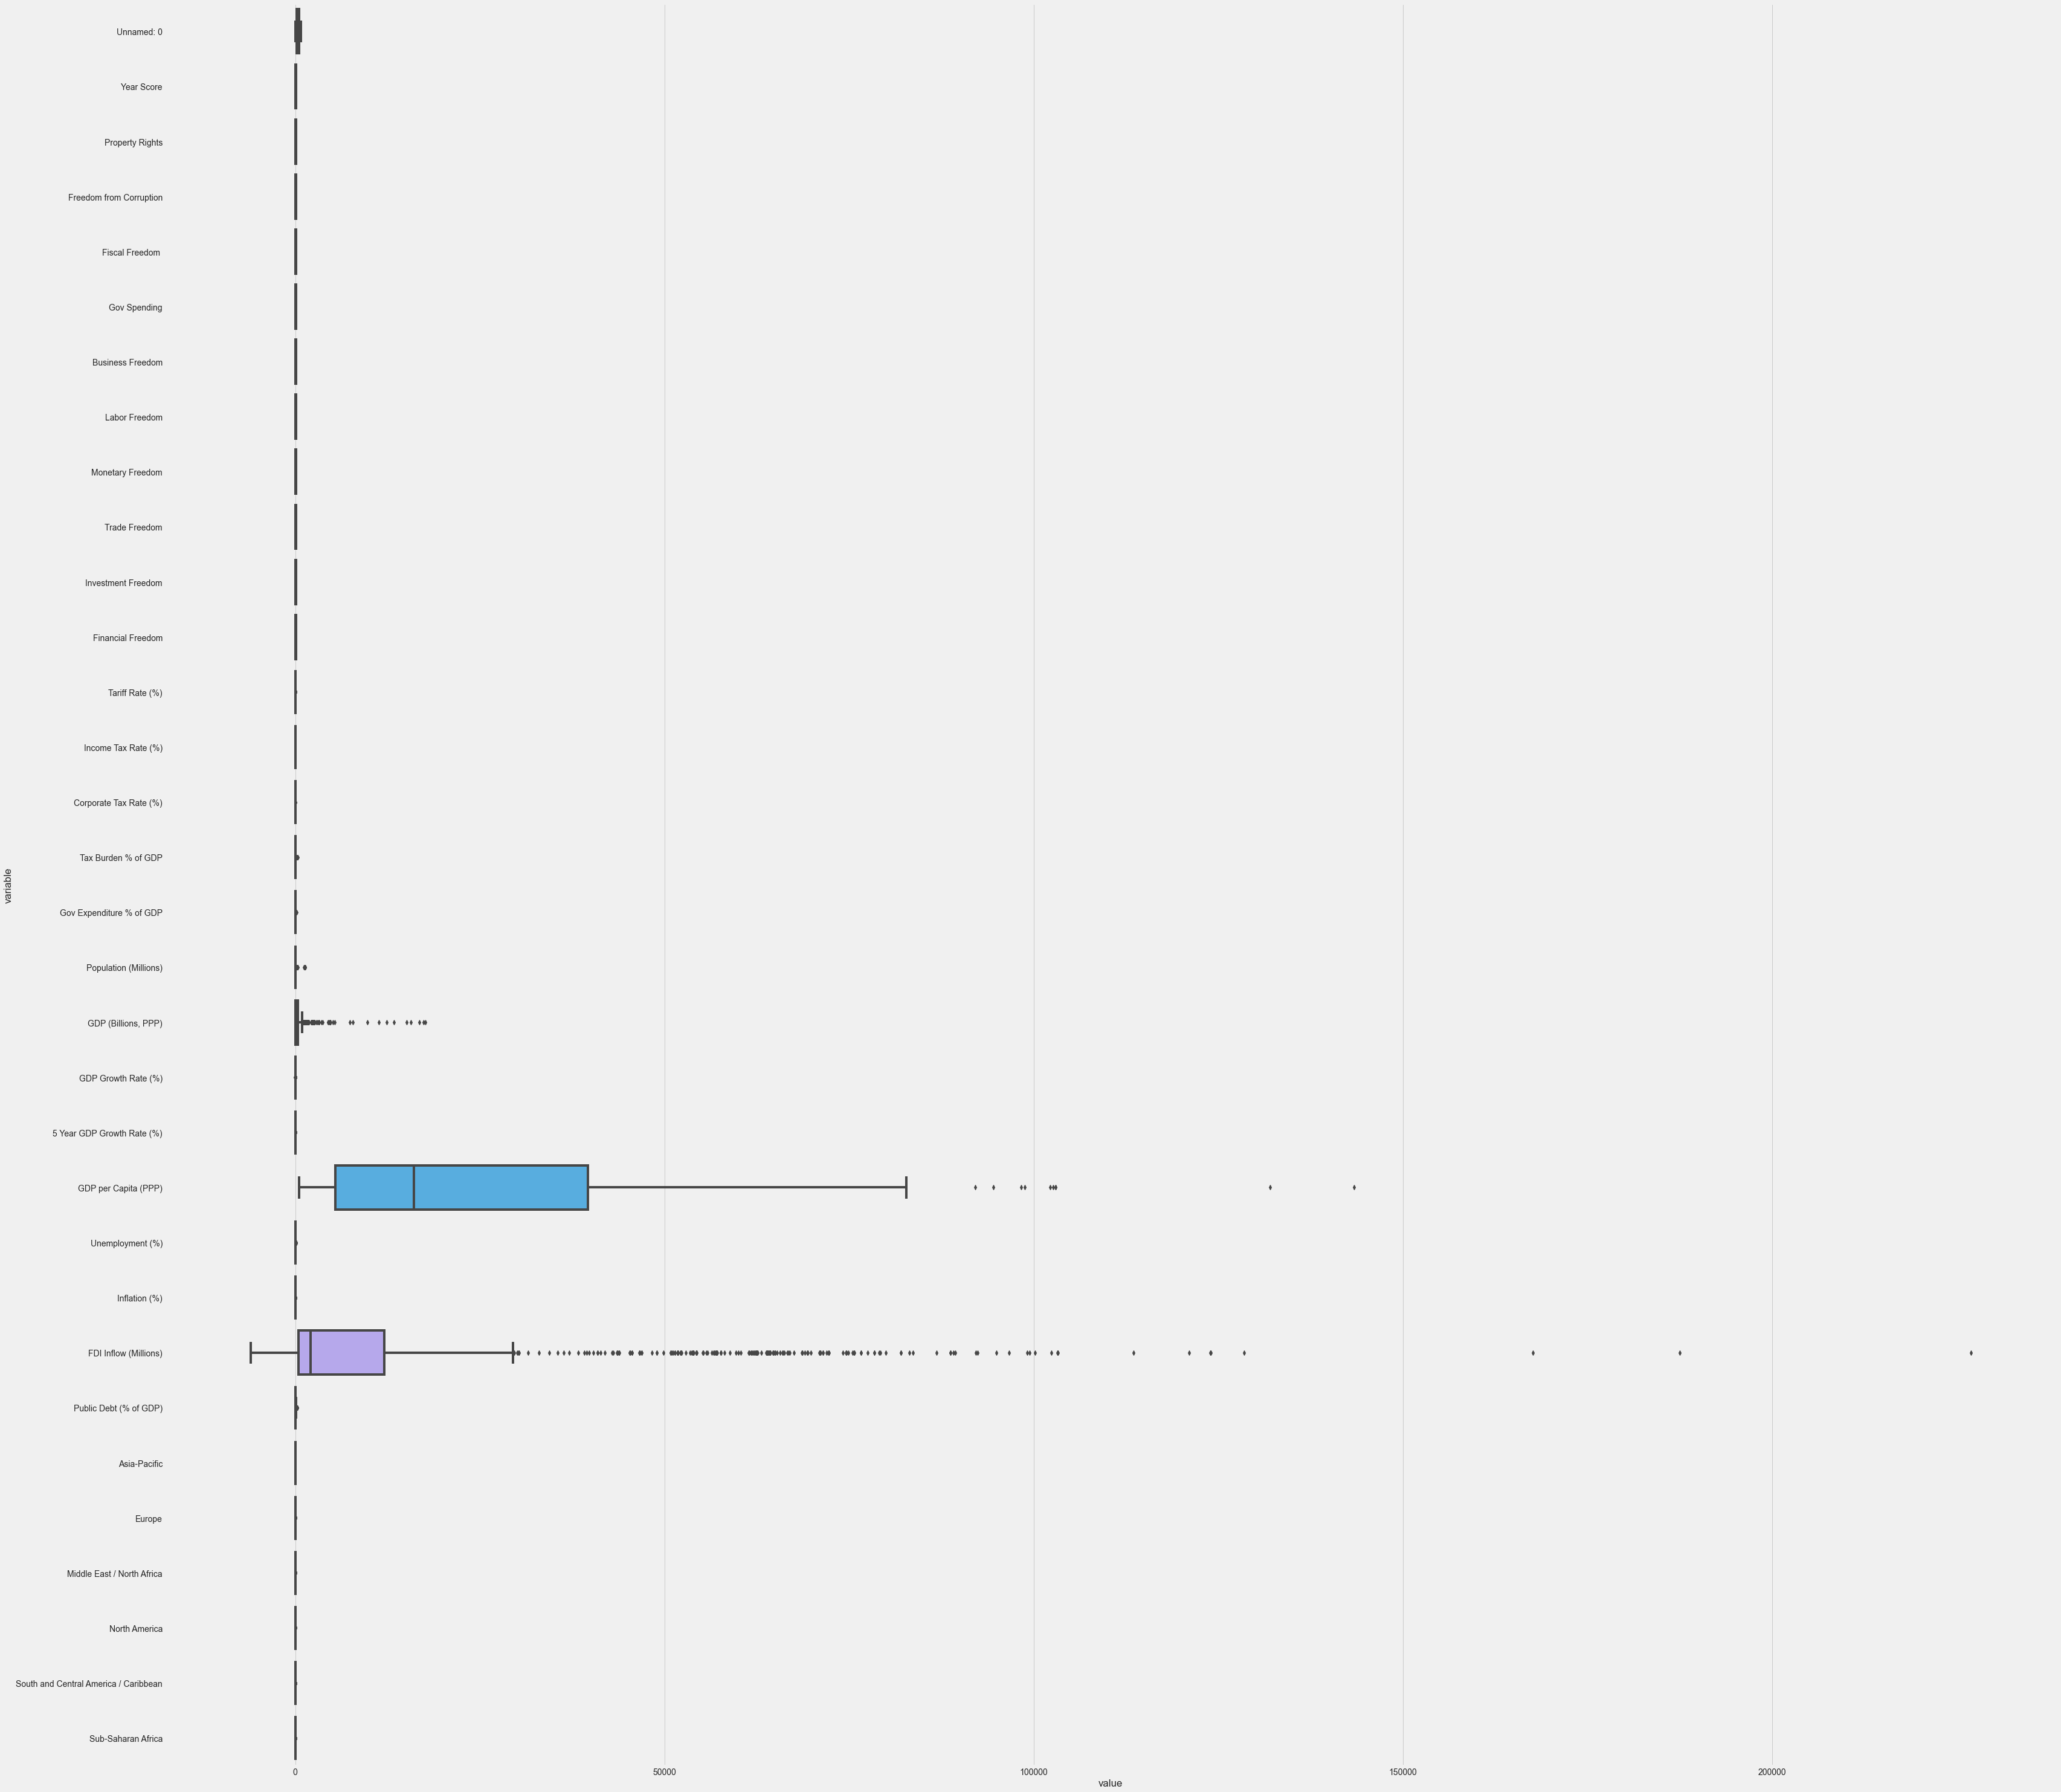

In [222]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")  #adding style to our plots
plt.figure(figsize=(50, 50))
sns.boxplot(x="value", y="variable", data=pd.melt(X))

<AxesSubplot:xlabel='variable', ylabel='value'>

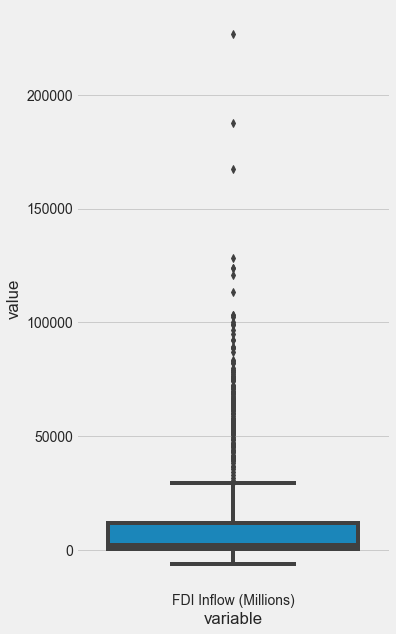

In [223]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['FDI Inflow (Millions)']]))

In [224]:
scaler = StandardScaler()
X[['FDI Inflow (Millions)']] = scaler.fit_transform(X[['FDI Inflow (Millions)']])

<AxesSubplot:xlabel='variable', ylabel='value'>

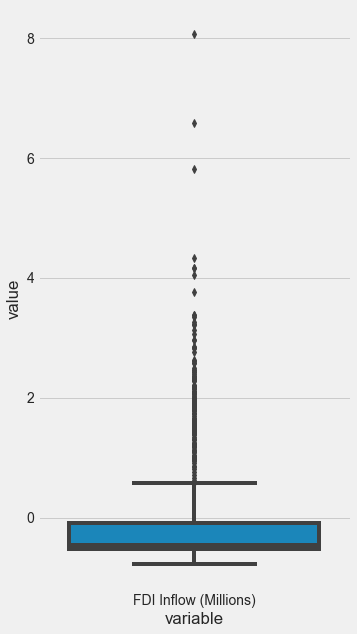

In [225]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['FDI Inflow (Millions)']]))

<AxesSubplot:xlabel='variable', ylabel='value'>

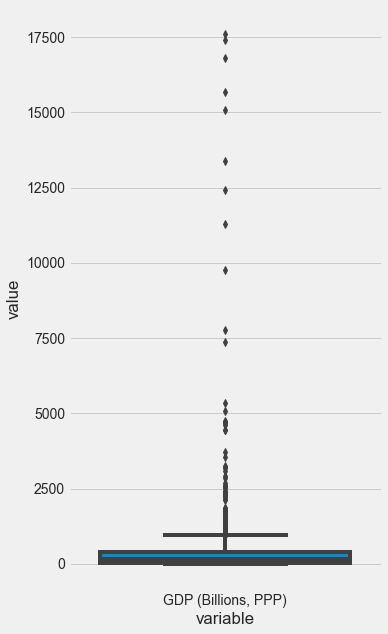

In [226]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['GDP (Billions, PPP)']]))

In [227]:
X['GDP (Billions, PPP)'] = np.log2(X['GDP (Billions, PPP)'])

<AxesSubplot:xlabel='variable', ylabel='value'>

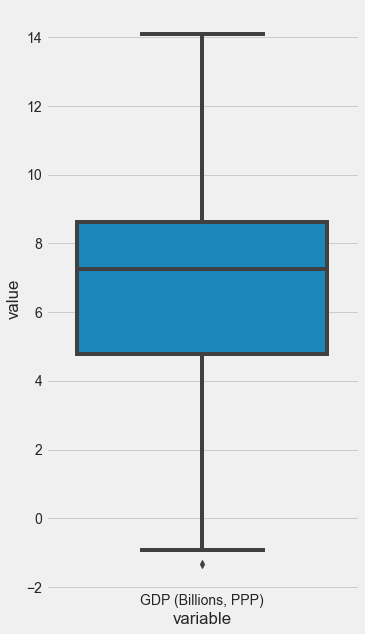

In [228]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['GDP (Billions, PPP)']]))

In [229]:
X.columns

Index(['Unnamed: 0', 'Year Score', 'Property Rights',
       'Freedom from Corruption', 'Fiscal Freedom ', 'Gov Spending',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov Expenditure % of GDP',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Asia-Pacific', 'Europe',
       'Middle East / North Africa', 'North America',
       'South and Central America / Caribbean', 'Sub-Saharan Africa'],
      dtype='object')

<AxesSubplot:>

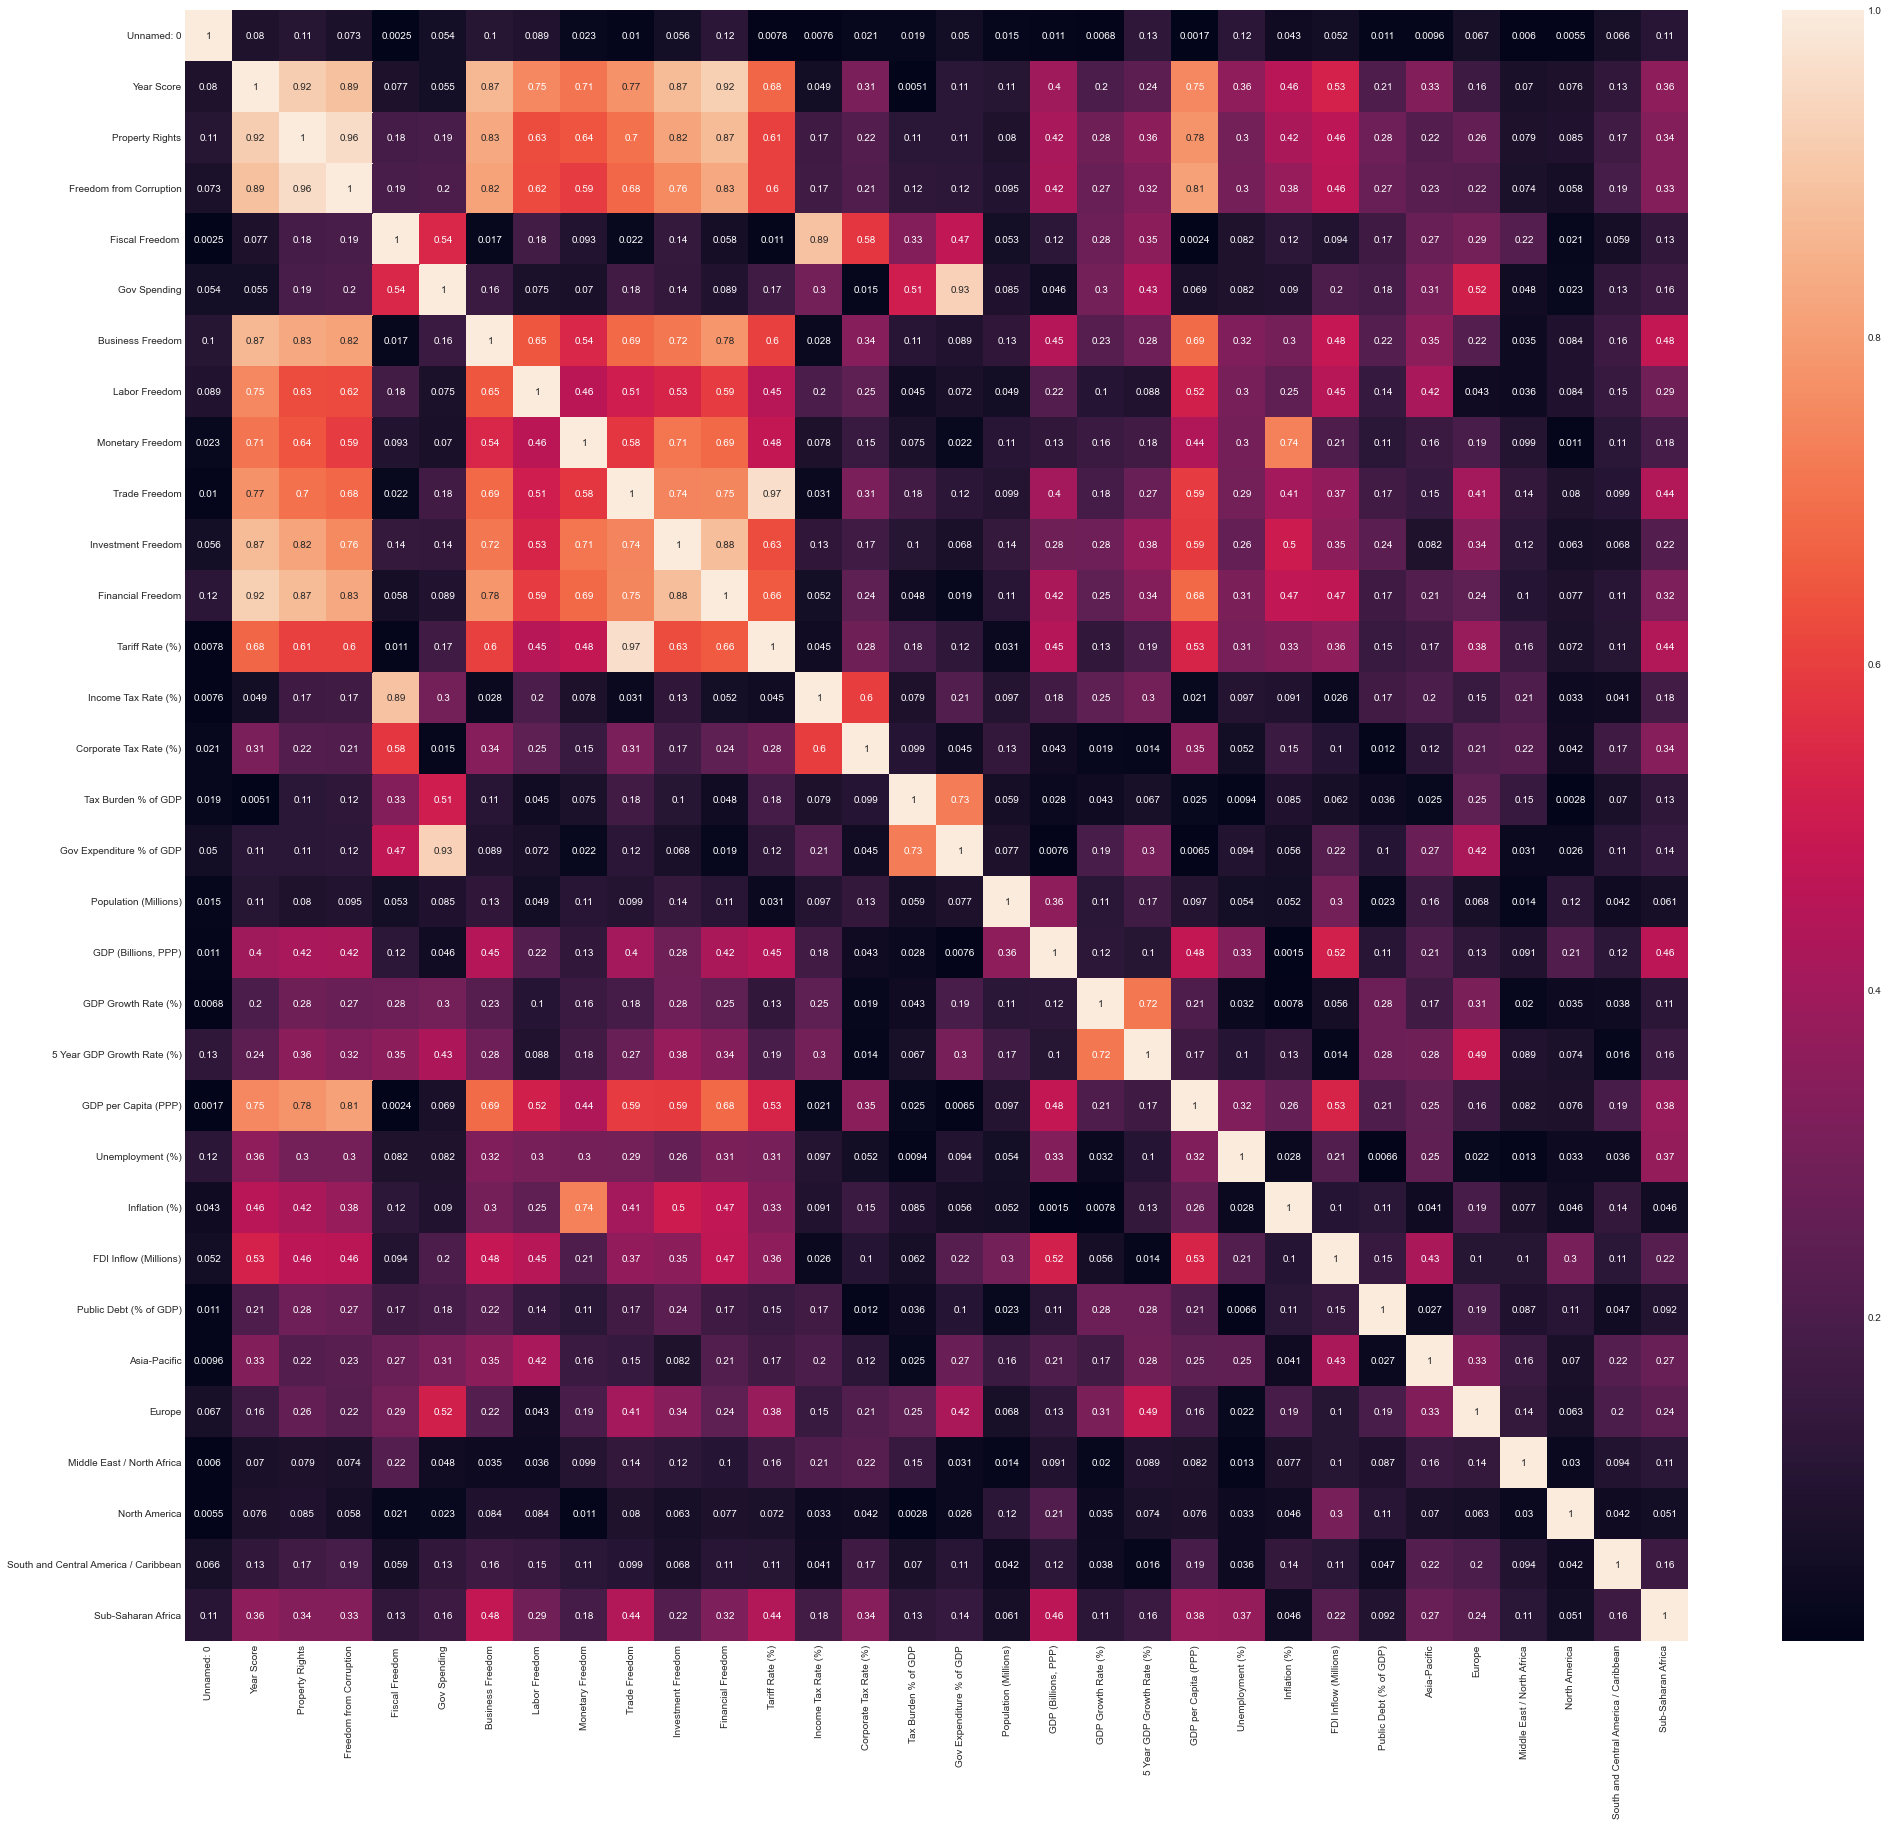

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30, 30))
sns.heatmap(X.corr().abs(),  annot=True)

In [231]:
X=X.drop(['Financial Freedom','Investment Freedom','Year Score','GDP per Capita (PPP)','GDP (Billions, PPP)','Tariff Rate (%)'], axis=1)

In [232]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [233]:
corr_features = correlation(X, 0.60)
len(set(corr_features))

9

In [234]:
corr_features

{'5 Year GDP Growth Rate (%)',
 'Business Freedom',
 'Freedom from Corruption',
 'Gov Expenditure % of GDP',
 'Income Tax Rate (%)',
 'Inflation (%)',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom'}

<AxesSubplot:xlabel='Inflation (%)', ylabel='Year Score'>

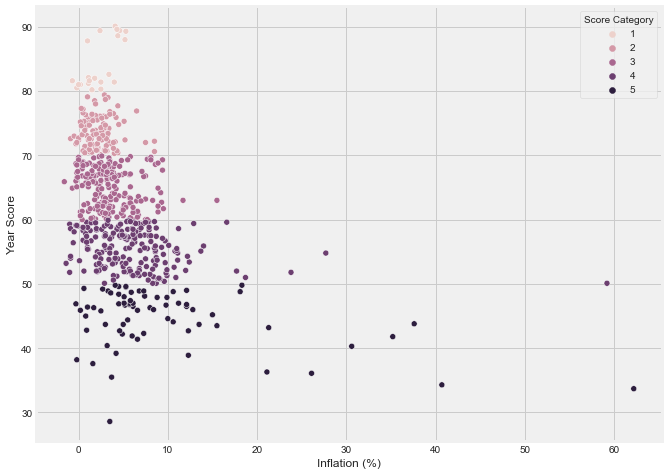

In [235]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Inflation (%)", y="Year Score", hue='Score Category')

In [236]:
X=X.drop(corr_features,axis=1)   #removing the features

# Correlation Matrix

<AxesSubplot:>

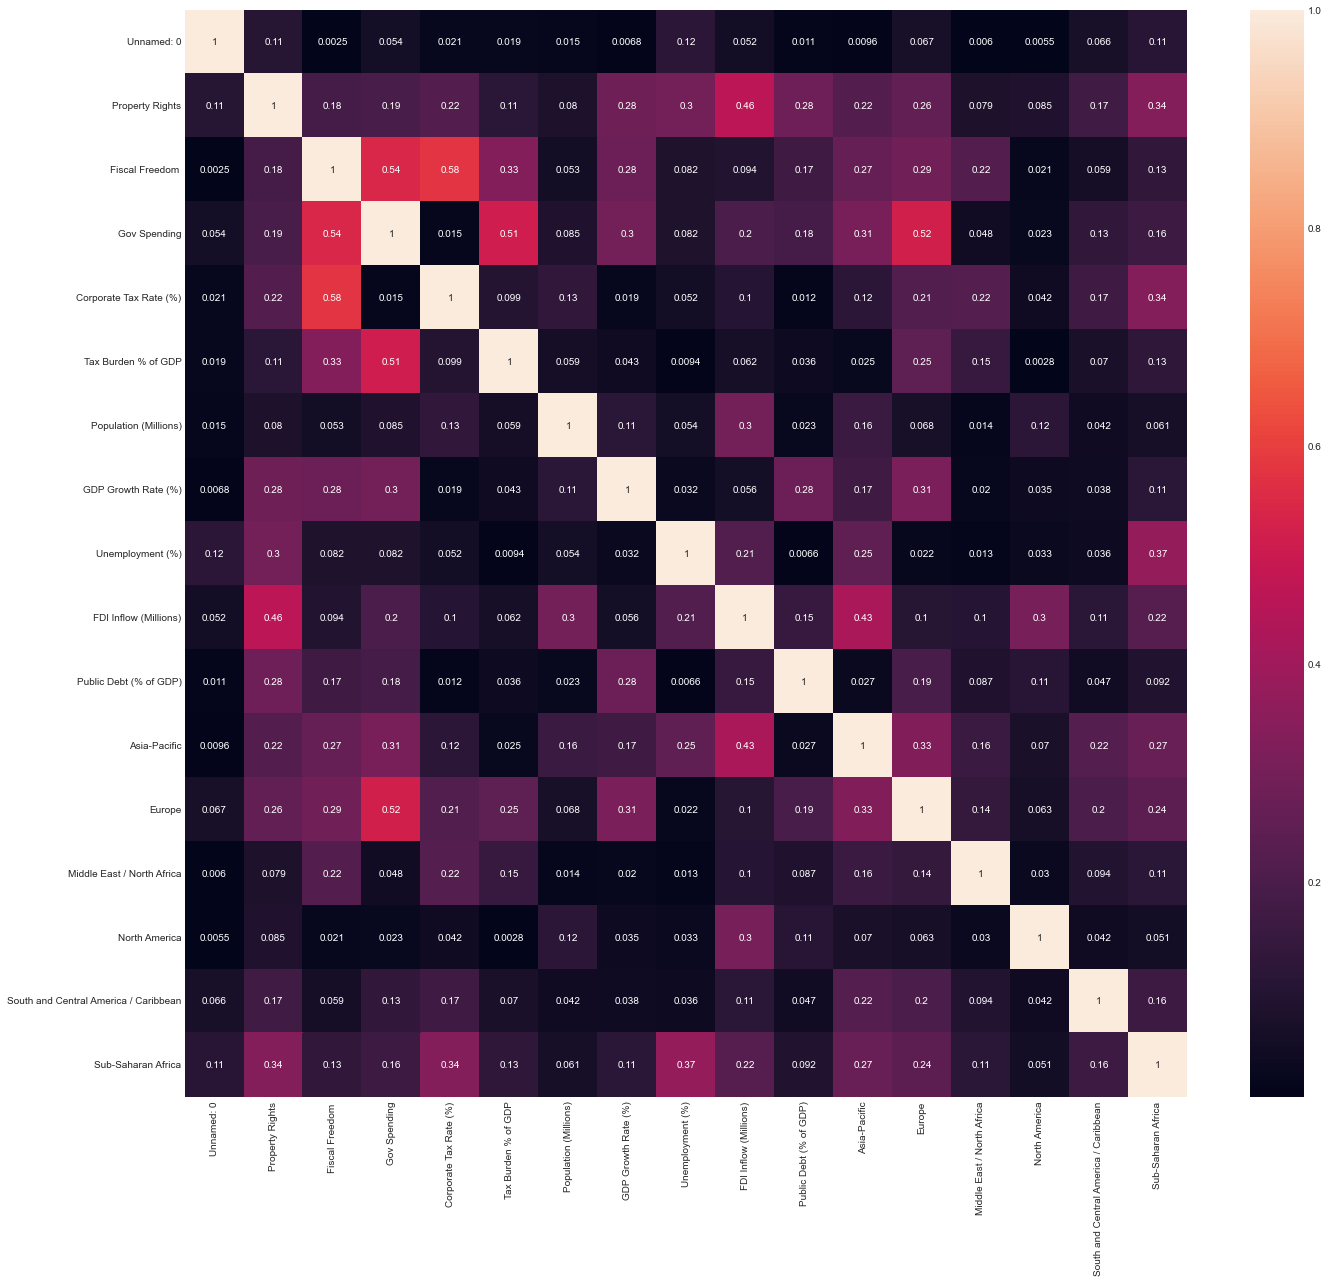

In [237]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 20))
sns.heatmap(X.corr().abs(),  annot=True)

In [238]:
#X.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), 
#                                                   title="Correlation with target")

In [239]:
X=X.fillna(X.mean())

In [240]:
X.isnull().sum()

Unnamed: 0                               0
Property Rights                          0
Fiscal Freedom                           0
Gov Spending                             0
Corporate Tax Rate (%)                   0
Tax Burden % of GDP                      0
Population (Millions)                    0
GDP Growth Rate (%)                      0
Unemployment (%)                         0
FDI Inflow (Millions)                    0
Public Debt (% of GDP)                   0
Asia-Pacific                             0
Europe                                   0
Middle East / North Africa               0
North America                            0
South and Central America / Caribbean    0
Sub-Saharan Africa                       0
dtype: int64

In [241]:
X.shape

(990, 17)

In [242]:
y.shape

(990, 1)

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=100)

In [244]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [245]:
y_train.head()

,Score Category
616,1
151,4
341,4
396,2
271,4


In [246]:
y_test.head()

,Score Category
200,3
329,3
914,5
175,3
225,4


# Logistic Regression

In [247]:
model = LogisticRegression()

In [248]:
model.fit(X_train, y_train)

D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [249]:
y_pred = model.predict(X_test)

In [250]:
# Print Accuracy on testing set
test_accuracy_sklearn = accuracy_score(y_test, y_pred)

print(f"\nAccuracy on testing set with scaling: {test_accuracy_sklearn}")


Accuracy on testing set with scaling: 0.7702020202020202


In [251]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report
#report=pd.DataFrame(eval(report))

'              precision    recall  f1-score   support\n\n           1       0.87      0.94      0.90        79\n           2       0.76      0.72      0.74        67\n           3       0.72      0.63      0.67        94\n           4       0.68      0.76      0.71        86\n           5       0.84      0.84      0.84        70\n\n    accuracy                           0.77       396\n   macro avg       0.77      0.78      0.77       396\nweighted avg       0.77      0.77      0.77       396\n'

In [252]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
#sns.heatmap(cm, annot=True)

array([[74,  5,  0,  0,  0],
       [ 7, 48, 12,  0,  0],
       [ 4,  9, 59, 20,  2],
       [ 0,  1, 11, 65,  9],
       [ 0,  0,  0, 11, 59]], dtype=int64)

In [253]:
from sklearn.metrics import precision_recall_fscore_support
score=precision_recall_fscore_support(y_test,y_pred)
score

(array([0.87058824, 0.76190476, 0.7195122 , 0.67708333, 0.84285714]),
 array([0.93670886, 0.71641791, 0.62765957, 0.75581395, 0.84285714]),
 array([0.90243902, 0.73846154, 0.67045455, 0.71428571, 0.84285714]),
 array([79, 67, 94, 86, 70], dtype=int64))

# Decision Tree

In [254]:
from sklearn.tree import DecisionTreeClassifier

In [255]:


model2 = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_leaf=1, max_depth=8, min_samples_split=2)

In [256]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

In [257]:
y_pred = model2.predict(X_test)

In [258]:
# Print Accuracy on testing set
test_accuracy_sklearn = accuracy_score(y_test, y_pred)

print(f"\nAccuracy on testing set with scaling: {test_accuracy_sklearn}")


Accuracy on testing set with scaling: 0.8358585858585859


In [259]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[75,  4,  0,  0,  0],
       [ 0, 56, 11,  0,  0],
       [ 0,  9, 71, 14,  0],
       [ 0,  0, 14, 66,  6],
       [ 0,  0,  4,  3, 63]], dtype=int64)

In [260]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report
#report=pd.DataFrame(eval(report))

'              precision    recall  f1-score   support\n\n           1       1.00      0.95      0.97        79\n           2       0.81      0.84      0.82        67\n           3       0.71      0.76      0.73        94\n           4       0.80      0.77      0.78        86\n           5       0.91      0.90      0.91        70\n\n    accuracy                           0.84       396\n   macro avg       0.85      0.84      0.84       396\nweighted avg       0.84      0.84      0.84       396\n'

In [261]:
predict_train_dtc = model2.predict(X_train)
predict_test_dtc = model2.predict(X_test)
print('Training Accuracy:', accuracy_score(y_train, predict_train_dtc))
print('Testing Accuracy:', accuracy_score(y_test, predict_test_dtc))

Training Accuracy: 0.9663299663299664
Testing Accuracy: 0.8358585858585859


In [262]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [263]:
paramgrid = {
    'max_depth': list(range(2, 10, 2)),
    'criterion': ["gini", "entropy"]
}
grid_search=GridSearchCV(DecisionTreeClassifier(),paramgrid)

In [264]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [265]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=8)

In [266]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [267]:
grid_search.best_score_

0.8433983762996725

# Random Forest

In [268]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier()
model3 = model3.fit(X_train, y_train)
predict_train_rf = model3.predict(X_train)
predict_test_rf = model3.predict(X_test)

print('Training Accuracy:', accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', accuracy_score(y_test, predict_test_rf))

Rf_score_before=accuracy_score(y_test, predict_test_rf)

Training Accuracy: 1.0
Validation Accuracy: 0.9090909090909091


D:\Anaconda\envs\test_gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [269]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[75,  4,  0,  0,  0],
       [ 0, 56, 11,  0,  0],
       [ 0,  9, 71, 14,  0],
       [ 0,  0, 14, 66,  6],
       [ 0,  0,  4,  3, 63]], dtype=int64)

In [112]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report
#report=pd.DataFrame(eval(report))

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        79\n           2       0.88      0.87      0.87        67\n           3       0.78      0.77      0.77        94\n           4       0.79      0.83      0.81        86\n           5       0.94      0.93      0.94        70\n\n    accuracy                           0.87       396\n   macro avg       0.88      0.88      0.88       396\nweighted avg       0.87      0.87      0.87       396\n'

# SVM

In [64]:
from sklearn.model_selection import GridSearchCV
model4 = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],                         #inside the dictionary we can define every possible parameter values
    'kernel': ['rbf','linear']              #the dictionary inside is what we call parameter grid
}, cv=5, return_train_score=False)
model4.fit(X_train, y_train)
model4.cv_results_        #cv_results_ is the dictionary

D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

{'mean_fit_time': array([3.06120396e-02, 3.73198066e+00, 3.20009708e-02, 2.38137499e+01,
        3.18112373e-02, 3.92364379e+01]),
 'std_fit_time': array([3.26708574e-03, 5.23777363e-01, 1.09729238e-03, 1.92265436e+00,
        1.16313876e-03, 1.09055994e+01]),
 'mean_score_time': array([0.00799956, 0.00240188, 0.00840778, 0.00240111, 0.00779724,
        0.00241442]),
 'std_score_time': array([4.97284234e-06, 4.89454062e-04, 4.93536143e-04, 4.85626961e-04,
        7.44449481e-04, 5.01929751e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'li

In [65]:
df_results = pd.DataFrame(model4.cv_results_)       #The above dictionary can be converted into a dataframe
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030612,0.003267,0.008000,0.000005,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.260504,0.319328,0.268908,0.268908,0.288136,0.281157,0.021130,6
1,3.731981,0.523777,0.002402,0.000489,1,linear,"{'C': 1, 'kernel': 'linear'}",0.857143,0.823529,0.865546,0.773109,0.855932,0.835052,0.034128,1
2,0.032001,0.001097,0.008408,0.000494,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.260504,0.319328,0.268908,0.277311,0.288136,0.282837,0.020411,4
3,23.813750,1.922654,0.002401,0.000486,10,linear,"{'C': 10, 'kernel': 'linear'}",0.840336,0.823529,0.848739,0.756303,0.830508,0.819883,0.032923,2
4,0.031811,0.001163,0.007797,0.000744,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.260504,0.319328,0.268908,0.277311,0.288136,0.282837,0.020411,4
5,39.236438,10.905599,0.002414,0.000502,20,linear,"{'C': 20, 'kernel': 'linear'}",0.831933,0.815126,0.840336,0.739496,0.830508,0.811480,0.036900,3


In [66]:
model4.best_params_

{'C': 1, 'kernel': 'linear'}

In [67]:
model4.best_score_

0.8350519868964534

In [68]:
df

,Unnamed: 0,World Rank,Region Rank,Year Score,Property Rights,Freedom from Corruption,Fiscal Freedom,Gov Spending,Business Freedom,Labor Freedom,...,Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score Category,Asia-Pacific,Europe,Middle East / North Africa,North America,South and Central America / Caribbean,Sub-Saharan Africa
0,1,58,27,65.2,30,31.0,92.6,75.1,81.0,49.0,...,3.4,1031.4,58.9,3,0,1,0,0,0,0
1,2,145,14,49.6,30,29.0,80.4,44.1,65.2,52.6,...,4.5,2571.0,9.9,5,0,0,1,0,0,0
2,4,160,27,46.7,15,30.0,64.3,52.1,60.1,47.4,...,9.8,7243.1,44.2,5,0,0,0,0,1,0
3,5,38,17,69.4,30,26.0,88.0,82.1,87.6,77.1,...,7.7,524.6,35.1,3,0,1,0,0,0,0
4,6,3,3,82.6,90,88.0,66.4,62.8,95.5,83.5,...,3.4,41316.7,22.9,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,726,166,39,46.0,15,18.0,90.4,66.6,67.1,61.9,...,8.4,751.4,8.5,5,1,0,0,0,0,0
595,728,176,28,33.7,5,19.0,74.9,56.7,45.3,29.5,...,62.2,320.0,45.6,5,0,0,0,0,1,0
596,729,131,27,54.0,15,31.0,79.3,75.1,58.3,62.6,...,4.1,9200.0,58.7,4,1,0,0,0,0,0
597,731,106,16,58.8,30,38.0,73.3,81.1,66.4,48.3,...,7.9,2483.8,31.1,4,0,0,0,0,0,1


# Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()

In [70]:
model5.fit(X_train, y_train)

D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [71]:
model5.score(X_test, y_test)

0.5858585858585859

In [72]:
y_pred=model5.predict(X_test)

In [73]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.85      0.99      0.91        79
           2       0.48      0.30      0.37        67
           3       0.47      0.44      0.45        94
           4       0.58      0.37      0.45        86
           5       0.51      0.87      0.64        70

    accuracy                           0.59       396
   macro avg       0.58      0.59      0.57       396
weighted avg       0.58      0.59      0.56       396



In [74]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[78,  1,  0,  0,  0],
       [14, 20, 27,  6,  0],
       [ 0, 21, 41, 17, 15],
       [ 0,  0, 10, 32, 44],
       [ 0,  0,  9,  0, 61]], dtype=int64)

In [75]:
from sklearn.metrics import precision_recall_fscore_support
score=precision_recall_fscore_support(y_test,y_pred)
score

(array([0.84782609, 0.47619048, 0.47126437, 0.58181818, 0.50833333]),
 array([0.98734177, 0.29850746, 0.43617021, 0.37209302, 0.87142857]),
 array([0.9122807 , 0.36697248, 0.45303867, 0.45390071, 0.64210526]),
 array([79, 67, 94, 86, 70], dtype=int64))

# Gradient Boosting 

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [114]:
model6.fit(X_train, y_train)

D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [115]:
model6.score(X_test, y_test)

0.8661616161616161

In [116]:
y_pred=model6.predict(X_test)

In [117]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.99      0.99      0.99        79
           2       0.88      0.90      0.89        67
           3       0.83      0.72      0.77        94
           4       0.76      0.83      0.79        86
           5       0.89      0.94      0.92        70

    accuracy                           0.87       396
   macro avg       0.87      0.87      0.87       396
weighted avg       0.87      0.87      0.87       396



In [118]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[78,  1,  0,  0,  0],
       [ 1, 60,  6,  0,  0],
       [ 0,  7, 68, 18,  1],
       [ 0,  0,  8, 71,  7],
       [ 0,  0,  0,  4, 66]], dtype=int64)

In [119]:
from sklearn.metrics import precision_recall_fscore_support
score=precision_recall_fscore_support(y_test,y_pred)
score

(array([0.98734177, 0.88235294, 0.82926829, 0.76344086, 0.89189189]),
 array([0.98734177, 0.89552239, 0.72340426, 0.8255814 , 0.94285714]),
 array([0.98734177, 0.88888889, 0.77272727, 0.79329609, 0.91666667]),
 array([79, 67, 94, 86, 70], dtype=int64))

In [120]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report
#report=pd.DataFrame(eval(report))

'              precision    recall  f1-score   support\n\n           1       0.99      0.99      0.99        79\n           2       0.88      0.90      0.89        67\n           3       0.83      0.72      0.77        94\n           4       0.76      0.83      0.79        86\n           5       0.89      0.94      0.92        70\n\n    accuracy                           0.87       396\n   macro avg       0.87      0.87      0.87       396\nweighted avg       0.87      0.87      0.87       396\n'

# Xgboost

In [121]:
import xgboost as xgb

In [122]:
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "error"
param['eta'] = 0.3
param['gamma'] = 0
param['max_depth'] = 6
param['min_child_weight']=1
param['max_delta_step'] = 0
param['subsample']= 1
param['colsample_bytree']=1
param['silent'] = 1
param['seed'] = 0
param['base_score'] = 0.5

In [123]:
model7 = xgb.XGBClassifier(param)

D:\Anaconda\envs\test_gpu\lib\site-packages\xgboost\core.py:502: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


In [124]:
model7.fit(X_train,y_train)

preds = model7.predict(X_test)

D:\Anaconda\envs\test_gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\Anaconda\envs\test_gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:46:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [125]:
model7.score(X_test,y_test)

0.9141414141414141

In [126]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[78,  1,  0,  0,  0],
       [ 1, 60,  6,  0,  0],
       [ 0,  7, 68, 18,  1],
       [ 0,  0,  8, 71,  7],
       [ 0,  0,  0,  4, 66]], dtype=int64)

In [127]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report
#report=pd.DataFrame(eval(report))

'              precision    recall  f1-score   support\n\n           1       0.99      0.99      0.99        79\n           2       0.88      0.90      0.89        67\n           3       0.83      0.72      0.77        94\n           4       0.76      0.83      0.79        86\n           5       0.89      0.94      0.92        70\n\n    accuracy                           0.87       396\n   macro avg       0.87      0.87      0.87       396\nweighted avg       0.87      0.87      0.87       396\n'

# ANN

In [41]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras import utils as np_utils
import pylab as plt

In [42]:
batch_size = 128
num_classes = 5
epochs = 100

In [43]:
X_train.shape

(594, 17)

In [44]:
y_train.shape

(594, 1)

In [45]:
y_train.head()

,Score Category
616,1
151,4
341,4
396,2
271,4


In [46]:
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

In [47]:
#y_train = y_train.values.reshape(-1,1)
#y_test = y_train.values.reshape(-1,1)

In [56]:
first_layer_size = 12
model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(17,)))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                216       
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 91        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 30        
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [58]:
X_train.shape

(594, 17)

In [59]:
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/100


ValueError: in user code:

    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\Anaconda\envs\test_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\Anaconda\envs\test_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\Anaconda\envs\test_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\engine\training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    D:\Anaconda\envs\test_gpu\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\losses.py:1666 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    D:\Anaconda\envs\test_gpu\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    D:\Anaconda\envs\test_gpu\lib\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    D:\Anaconda\envs\test_gpu\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 5) are incompatible
